In [3]:

import matplotlib as mpl 
import numpy as np
import matplotlib.pyplot as plt
font = {'font.size':20}
plt.rcParams.update(font)
import matplotlib.colors as colors

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import sys, os
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

widthcbar ="5%"
distwbar="15%"
initial_distwbar = "2%"


In [4]:
import xarray as xr 
import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib as mpl 
from matplotlib.ticker import MaxNLocator
rcParams = {'font.size':20}
plt.rcParams.update(rcParams)

In [27]:
folder = "/home/peter/EasterIslands/Runs_22May/Standard/"
folders = [folder+"FullModel_grid50_gH17e-3_noRegrowth_highFix_linear_NormPop_alphaStd_seed"+str(seed)+"/" for seed in np.arange(1,26)]
stds = [xr.open_dataset(folder+"Statistics.ncdf") for folder in folders]
label = "Standard"

In [6]:
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt 
import observefunc as obs
plt.rcParams.update({"font.size":20})

#folder="/home/peter/EasterIslands/Code/Full_Model/Figs_May11_grid50/FullModel_grid50_repr7e-03_mv100_noRegrowth_highFix_seed101/"
import pickle
import config
from pathlib import Path   # for creating a new directory
filename = "Map/EI_grid"+str(stds[0].gridpoints_y)+"_rad"+str(stds[0].r_T)+"+"+str(stds[0].r_F)+"+"+str(stds[0].r_M_later)
if Path(filename).is_file():
    with open(filename, "rb") as EIfile:
        config.EI = pickle.load(EIfile)
config.EI_triObject = mpl.tri.Triangulation(config.EI.points_EI_km[:,0], config.EI.points_EI_km[:,1], triangles = config.EI.all_triangles, mask=config.EI.mask)



In [3]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [4]:
#distortions=[]
#Ks = np.arange(5,15)
#for K in Ks:
#    scaler =  MinMaxScaler()
#    data_scaled =scaler.fit_transform(points)
#    a = KMeans(n_clusters=K).fit(data_scaled)
#    clusterPoints = scaler.inverse_transform(a.cluster_centers_)
#    print(K, a.inertia_)
#    distortions.append(a.inertia_)
#    #print(davies_bouldin_score(data_scaled, a.labels_))
#    #silhouette_avg = silhouette_score(data_scaled, a.labels_)
#    #sample_silhouette_values = silhouette_samples(data_scaled, a.labels_)
#    #print(silhouette_avg)


In [9]:
from yellowbrick.cluster import KElbowVisualizer
import observefunc as obs


k = 0
for t in np.arange(1200,1901, 100):
    # https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
    #K = kelbow_visualizer(KMeans(), data_scaled, k=(4,15)).elbow_value_
    data = stds[0].sel(time=t)
    Tprefs = data.TreePrefAgents.to_series().dropna()
    Pos = data.PosAgents.to_series().dropna()
    points = np.concatenate((np.array(Pos).reshape(Tprefs.shape[0],2), np.array(Tprefs).reshape(Tprefs.shape[0],1)) ,axis=1)

    scaler =  MinMaxScaler()
    data_scaled =scaler.fit_transform(points)
    
    plt.figure()
    model = KElbowVisualizer(KMeans(), k=(4,min(15, data_scaled.shape[0])), metric="distortion")
    K = model.fit(data_scaled).elbow_value_
    print(K)
    a = KMeans(n_clusters=K).fit(data_scaled)
    clusterPoints = scaler.inverse_transform(a.cluster_centers_)
    plt.close()
    fig, ax, cmaps = obs.observe(t, fig=None, ax=None, specific_ag_to_follow=None, save=False, data = stds[k], ncdf=True, folder=folder, posSize_small=False, legend=False, cbar=[False, False, False], cbarax=None)

    plot = ax.scatter(clusterPoints[:,0], config.EI.corners['upper_left'][1] - clusterPoints[:,1],marker="x", s=100, c=clusterPoints[:,2], cmap = cmaps[2], vmin=0.2, vmax=0.8)#'purple')
    plt.savefig("ClusterSTDS"+str(t)+".pdf", bbox_inches='tight')
    plt.close()


6
8
9
7
7
7
7
7


10


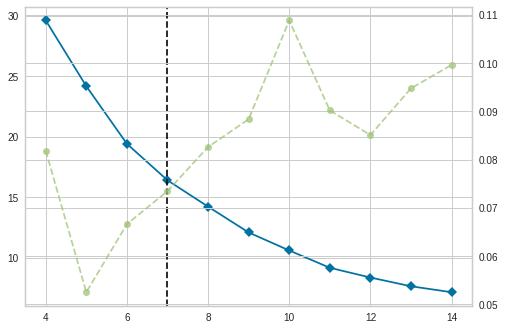

In [26]:
data = stds[0].sel(time=1700)
Tprefs = data.TreePrefAgents.to_series().dropna()
Pos = data.PosAgents.to_series().dropna()
points = np.concatenate((np.array(Pos).reshape(Tprefs.shape[0],2), np.array(Tprefs).reshape(Tprefs.shape[0],1)) ,axis=1)

scaler =  MinMaxScaler()
data_scaled =scaler.fit_transform(points)

plt.figure()
model = KElbowVisualizer(KMeans(), k=(4,min(15, data_scaled.shape[0])), metric="distortion")
K = model.fit(data_scaled).elbow_value_
K = 10
print(K)
a = KMeans(n_clusters=K).fit(data_scaled)
clusterPoints = scaler.inverse_transform(a.cluster_centers_)

# FIXED CLUSTER SPOTS

In [11]:
k=2

In [12]:
colorsRegions= np.array([
(141,211,199),
(255,237,111),
(190,186,218),
(251,128,114),
(128,177,211),
(253,180,98),
(179,222,105),
(252,205,229),
(217,217,217),
(188,128,189),
(204,235,197),
(255,255,179),

])
colorsRegions = colorsRegions/255


In [13]:
clusters = np.array(
    [
        [3.5, 15.5, "Kau"], # Kao
        #[7,13.5, "S Coast 1"], # South Coast left
        [13.5, 11., "S Coast 3"], # Middle South Coast
        [11, 13, "S Coast 2"], # South Coast right
        [17, 10, "S Raraku"],  # Raraku South
        [17., 5.5, "La Perouse Coast"], # Raraku North La Perouse Bay
        [14.5, 3.5, "Anakena"], # Anakena
        [7.5,2.5, "NW Coast"], # NOrth
        [4, 11.5, "Hanga Roa"], # Hanao Rau
        #[5, 9, "W Coast"], # North WEst coast
        [10.,  5.5 , "Mt Terevaka"], # Terevaka
        [13.5, 6.5, "Upland West"], # West Upland
        [10, 9, "Upland Middle"],# Middle Middle
        [22, 7., "Poike"], # Poike
    ]
    )


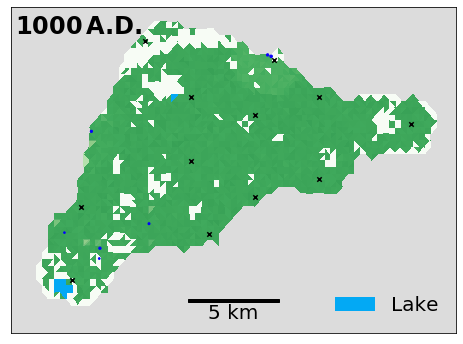

In [14]:
fig, ax, cmaps = obs.observe(1000, fig=None, ax=None, specific_ag_to_follow=None, save=False, data = stds[k], ncdf=True, folder=folder, posSize_small=False, legend=False, cbar=[False, False, False], cbarax=None)
ax.scatter(clusters[:,0].astype(float), config.EI.corners['upper_left'][1] - clusters[:,1].astype(float), marker="x", s=20, color='black')


In [15]:
inds_cluster_midpoints = np.array([config.EI.get_c_of_point(cP[:2].astype(float), config.EI_triObject)[0] for cP in clusters])

In [16]:
import scipy.spatial.distance
distMatrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(config.EI.vec_c)).astype(np.float32)
regions = np.argmin(distMatrix[inds_cluster_midpoints,:], axis=0)

In [19]:

def plot_Regions():
        #distwbar="15%"
        initial_distwbar="2%"
        fig = plt.figure(figsize=(10,6))
        ax = fig.add_subplot(1,1,1,fc='gainsboro')
        #ax, divider, _, _  = plot_agricultureSites_onTop(ax, divider, t, data=data, ncdf=ncdf, save =cbar[1], cbarax=cbarax)
        face_colors = regions #(config.EI.nr_highqualitysites+config.EI.nr_lowqualitysites).clip(min=0.1)
        cmap = colors.ListedColormap(colorsRegions)
        #boundaries = [-0.5,0.5,1.5, 2.5, 10.5,11.5,12.5]
        boundaries  = np.arange(-0.5, np.max(regions)+0.6, step=1)
        norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)
        #plot_agricultureSites_onTop(ax=ax, fig=fig)    
        ClansPlot = ax.tripcolor(config.EI.points_EI_km[:,0], config.EI.corners['upper_left'][1] - config.EI.points_EI_km[:,1], config.EI.EI_triangles, facecolors=face_colors, cmap=cmap, alpha=None, norm=norm) #, vmax=1, vmin=0)
        
        watertriangles = np.zeros([config.EI.N_c])
        watertriangles[config.EI.water_triangle_inds_NoDrought]=1
        watercmap =  LinearSegmentedColormap.from_list("watercmap",[(0,0,0,0),config.lakeColor],N=2) # Indigo blue
        _ = ax.tripcolor(config.EI.points_EI_km[:,0], config.EI.corners['upper_left'][1] - config.EI.points_EI_km[:,1], 
        config.EI.EI_triangles, facecolors=watertriangles, vmin = 0.0, vmax = 1, cmap=watercmap, alpha=None) 
        ax.set_aspect('equal')
        divider = make_axes_locatable(plt.gca())
        cax2 = divider.append_axes("right", widthcbar, pad=initial_distwbar)
        cb2 = colorbar(ClansPlot, cax =cax2)#, extend='min')     
        #cb2.set_label_text("Regions")
        cb2.ax.set_yticklabels(clusters[:,2], fontsize=20*10/16)
        cb2.ax.set_yticks(np.arange(max(regions)+1))
        #ax.set_title(str(t)+r"$\,$A.D.", x=0.01, y=0.9,fontweight="bold", loc='left')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
        scalebar = AnchoredSizeBar(ax.transData,
                            5, '5 km', 'lower center', 
                            pad=0.4,
                            color='black',
                            frameon=False,
                            size_vertical=0.2,
                            fontproperties= fm.FontProperties(size=20))#*(1+posSize_small*1)))
        ax.add_artist(scalebar)
        #waterbox = plt.Rectangle((0.75,0.8), 0.1,0.06, visible=True, label="Lakes", fc=config.lakeColor, transform = ax.transAxes)   
        #ax.add_artist(waterbox)
        #plt.text(0.95, 0.05, "Lakes", fontsize=15*(1+posSize_small*1), transform = ax.transAxes)
        
        lake = Patch(label="Lake", facecolor=config.lakeColor)
        ax.legend(handles = [lake], loc="lower right", frameon=False, fontsize=20)

        ax.scatter(clusters[:,0].astype(float), config.EI.corners['upper_left'][1] - clusters[:,1].astype(float), marker="x", s=20, color='black')

        plt.savefig("MapRegionsDetail.pdf")

        return #ax, divider, AgricPlot, (cmap, oranges[255])

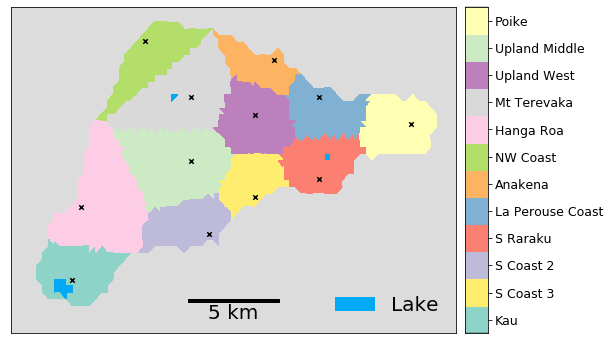

In [20]:
plot_Regions()



In [512]:
#fig = plt.figure(figsize=(16,9))
#ax = fig.add_subplot(111)
#regionpops=np.zeros((len(stds[0].time), len(clusters[:,2])))
#for r, reg in enumerate(clusters[:,2]):
#    regionpops[:,r] = stds[k].pop_ct.sel(triangles=np.where(regions == r)[0]).sum(dim="triangles")
#    stds[k].pop_ct.sel(triangles=np.where(regions == r)[0]).sum(dim="triangles").plot(ax=ax, lw=3, color=colorsRegions[r])
#    print(reg, regionpops[500,r] )
#stds[k].pop_ct.sum(dim="triangles").sel(time=1700)
#ax.set_xlim(1200,1900)
#ax.set_xlabel(r"Years  [${\rm A.D.}$]")
#ax.set_ylabel(r"$\mathbf{pop}_{\rm k} (t)$ for every region $k$")


# Coarse

In [21]:
#clusters = np.array(
#    [
# 0        [3.5, 15.5, "Rano Kau"], # Kao
#1 S Coast        [13.5, 11., "S Coast 3"], # Middle South Coast
#1 S Coast         [11, 13, "S Coast 2"], # South Coast right
#2        [17, 10, "S Raraku"],  # Raraku South
#2        [17., 5.5, "La Perouse Coast"], # Raraku North La Perouse Bay
#3        [14, 3.5, "Anakena"], # Anakena
#4        [7.5,2.5, "NW Coast"], # NOrth
#5        [4, 11.5, "Hanga Roa"], # Hanao Rau
#        #[5, 9, "W Coast"], # North WEst coast
#6 UPLANDS        [10.,  5.5 , "Mt Terevaka"], # Terevaka
#6 UPLANDS          [14, 7, "Upland West"], # West Upland
#6 UPLANDS          [10, 9, "Upland Middle"],# Middle Middle
#6 UPLANDS          [22, 7., "Poike"], # Poike
#    ]
#    )
Superregions = np.array([0, 1, 1, 2, 2, 3, 4,5,6,6,6,6])
Superregion_names = ["Rano Kau", "South Coast", "Rano Raraku", "Anakena Beach", "North West Coast", "Hanga Roa", "Uplands"]

In [24]:
def plot_Regions():
        plt.rcParams.update({"font.size":20})
        #distwbar="15%"
        initial_distwbar="2%"
        fig = plt.figure(figsize=(10,6))
        ax = fig.add_subplot(1,1,1,fc='gainsboro')
        #ax, divider, _, _  = plot_agricultureSites_onTop(ax, divider, t, data=data, ncdf=ncdf, save =cbar[1], cbarax=cbarax)
        face_colors = Superregions[regions] #(config.EI.nr_highqualitysites+config.EI.nr_lowqualitysites).clip(min=0.1)
        cmap = colors.ListedColormap(colorsRegions[0:(np.max(Superregions)+1)])
        #boundaries = [-0.5,0.5,1.5, 2.5, 10.5,11.5,12.5]
        boundaries  = np.arange(-0.5, np.max(Superregions)+0.6, step=1)
        norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)
        #plot_agricultureSites_onTop(ax=ax, fig=fig)    
        ClansPlot = ax.tripcolor(config.EI.points_EI_km[:,0], config.EI.corners['upper_left'][1] - config.EI.points_EI_km[:,1], config.EI.EI_triangles, facecolors=face_colors, cmap=cmap, alpha=None, norm=norm) #, vmax=1, vmin=0)
        colorscmap = [(1,1,1,0.2), (0,0,0,0.6)]
        cmapEl = LinearSegmentedColormap.from_list("binary",colorscmap[:], N=256)
        el = ax.tripcolor(config.EI.points_EI_km[:,0], config.EI.corners['upper_left'][1] - config.EI.points_EI_km[:,1], config.EI.EI_triangles, facecolors=config.EI.el_c, cmap=cmapEl, alpha=None) #, vmax=1, vmin=0)
        
        watertriangles = np.zeros([config.EI.N_c])
        watertriangles[config.EI.water_triangle_inds_NoDrought]=1
        watercmap =  LinearSegmentedColormap.from_list("watercmap",[(0,0,0,0),config.lakeColor],N=2) # Indigo blue
        _ = ax.tripcolor(config.EI.points_EI_km[:,0], config.EI.corners['upper_left'][1] - config.EI.points_EI_km[:,1], 
        config.EI.EI_triangles, facecolors=watertriangles, vmin = 0.0, vmax = 1, cmap=watercmap, alpha=None) 
        ax.set_aspect('equal')
        divider = make_axes_locatable(plt.gca())
        cax2 = divider.append_axes("right", widthcbar, pad=initial_distwbar)
        cb2 = colorbar(ClansPlot, cax =cax2)#, extend='min')     
        #cb2.set_label_text("Regions")
        cb2.ax.set_yticklabels(Superregion_names, fontsize=20*10/16)#clusters[:,2])
        cb2.ax.set_yticks(np.arange(np.max(Superregions)+1))
        #ax.set_title(str(t)+r"$\,$A.D.", x=0.01, y=0.9,fontweight="bold", loc='left')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
        scalebar = AnchoredSizeBar(ax.transData,
                            5, '5 km', 'lower center', 
                            pad=0.4,
                            color='black',
                            frameon=False,
                            size_vertical=0.2,
                            fontproperties= fm.FontProperties(size=20))#*(1+posSize_small*1)))
        ax.add_artist(scalebar)
        #waterbox = plt.Rectangle((0.75,0.8), 0.1,0.06, visible=True, label="Lakes", fc=config.lakeColor, transform = ax.transAxes)   
        #ax.add_artist(waterbox)
        #plt.text(0.95, 0.05, "Lakes", fontsize=15*(1+posSize_small*1), transform = ax.transAxes)
        
        lake = Patch(label="Lake", facecolor=config.lakeColor)
        ax.legend(handles = [lake], loc="lower right", frameon=False, fontsize=20)

        #ax.scatter(clusters[:,0].astype(float), config.EI.corners['upper_left'][1] - clusters[:,1].astype(float), marker="x", s=20, color='black')

        plt.savefig("MapRegionsCoarse.pdf", bbox_inches="tight")

        return #ax, divider, AgricPlot, (cmap, oranges[255])

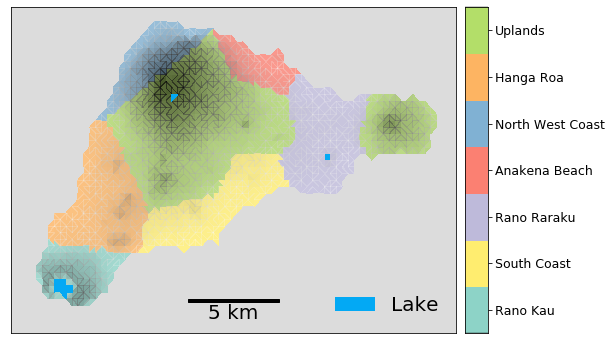

In [25]:
plot_Regions()

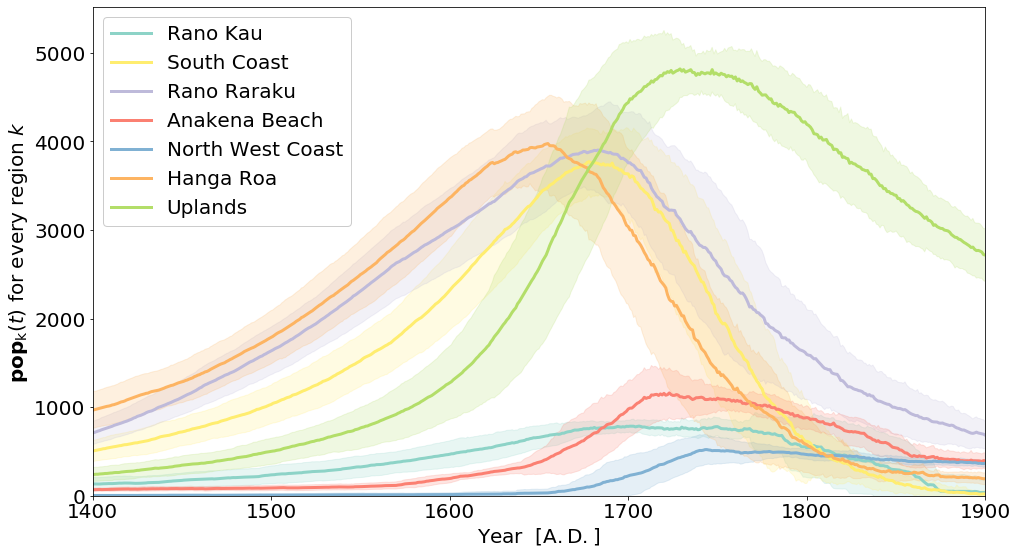

In [41]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, fc="white")
rcParams = {'font.size':20}
plt.rcParams.update(rcParams)
regionpops=np.zeros((len(stds[0].time), len(Superregion_names)))
for m, reg in enumerate(Superregion_names):
    #regionpops[:,Superregions[r]] += stds[k].pop_ct.sel(triangles=np.where(regions == r)[0]).sum(dim="triangles")
    #condition = [Superregions[regions]]==m]
    means=[]
    for k in range(15):
        means.append(stds[k].pop_ct.sel(triangles=np.where(Superregions[regions]==m)[0]).sum(dim="triangles"))
        #stds[k].pop_ct.sel(triangles=np.where(Superregions[regions]==m)[0]).sum(dim="triangles").plot(lw=3, color=colorsRegions[m], alpha=0.3)
    me=np.mean(np.array(means), axis=0)
    s=np.std(np.array(means), axis=0)
    plt.fill_between(stds[0].time, me-s,me+s,alpha=0.2, color=colorsRegions[m])
    plt.plot(stds[0].time, me,lw=3, color=colorsRegions[m], label=Superregion_names[m])
    #print(reg, regionpops[500,m] )
#stds[k].pop_ct.sum(dim="triangles").sel(time=1700)
ax.set_xlim(1400,1900)
ax.tick_params(axis="both", labelsize=20)
plt.rcParams.update(rcParams)
ax.set_xlabel(r"Year  [${\rm A.D.}$]", fontsize=20)
ax.set_ylabel(r"$\mathbf{pop}_{\rm k} (t)$ for every region $k$", fontsize=20)
plt.legend(loc="upper left", fontsize=20, frameon=True, fancybox=True, framealpha=1, facecolor="white")
ax.set_ylim(0,)
plt.savefig("RegionalStatsEnsembleOnly.pdf", bbox_inches="tight")


In [ ]:
colors

In [33]:
    plt.plot(stds[0].time, np.mean(np.array(means), axis=0),lw=3, color=colors[m], label=Superregion_names[m])

array([ 0.        ,  0.        ,  0.        , ..., 37.06666667,
       36.93333333, 35.6       ])

# Elevation and closest water

In [170]:
colorsRegions= np.array([
    (166,206,227),
    (31,120,180),
    (178,223,138),
    (51,160,44),
    (251,154,153),
    (227,26,28),
    (253,191,111),
    (255,127,0),
    (202,178,214),
    (106,61,154),
    (255,255,153),
    (177,89,40),
    (255,0,0),
    ])
colorsRegions = colorsRegions/255

In [160]:
colorsRegions.shape

(12, 3)

In [104]:
regionsA = config.EI.whichLakeIsClosest
regionsB = config.EI.el_c < 100
regions = np.array([(regionsA[c])+10*int(regionsB[c]) for c in range(config.EI.N_c)])


In [87]:
regions[:10]

[10, 10, 10, 10, 10, 11, 1, 11, 12, 10]

In [93]:
cmap = colors.ListedColormap(colorsRegions)
boundaries = [-0.5,0.5,1.5, 2.5, 10.5,11.5,12.5]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

In [100]:
norm.boundaries

array([-0.5,  0.5,  1.5,  2.5, 10.5, 11.5, 12.5])

In [105]:

def plot_Regions():
        #distwbar="15%"
        initial_distwbar="2%"
        fig = plt.figure(figsize=(10,6))
        ax = fig.add_subplot(1,1,1,fc='gainsboro')
        #ax, divider, _, _  = plot_agricultureSites_onTop(ax, divider, t, data=data, ncdf=ncdf, save =cbar[1], cbarax=cbarax)
        face_colors = regions #(config.EI.nr_highqualitysites+config.EI.nr_lowqualitysites).clip(min=0.1)
        #face_colors[face_colors==0]=-1.
        #cmap = LinearSegmentedColormap.from_list("bla",colorsRegions, N=len(colorsRegions))
        ##cmap = oranges
        #cmap.set_under("gray")
        cmap = colors.ListedColormap(colorsRegions)
        boundaries = [-0.5,0.5,1.5, 2.5, 10.5,11.5,12.5]
        norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)
        #plot_agricultureSites_onTop(ax=ax, fig=fig)    
        ClansPlot = ax.tripcolor(config.EI.points_EI_km[:,0], config.EI.corners['upper_left'][1] - config.EI.points_EI_km[:,1], config.EI.EI_triangles, facecolors=face_colors, cmap=cmap, alpha=None, norm=norm) #, vmax=1, vmin=0)
        
        watertriangles = np.zeros([config.EI.N_c])
        watertriangles[config.EI.water_triangle_inds_NoDrought]=1
        watercmap =  LinearSegmentedColormap.from_list("watercmap",[(0,0,0,0),config.lakeColor],N=2) # Indigo blue
        _ = ax.tripcolor(config.EI.points_EI_km[:,0], config.EI.corners['upper_left'][1] - config.EI.points_EI_km[:,1], 
        config.EI.EI_triangles, facecolors=watertriangles, vmin = 0.0, vmax = 1, cmap=watercmap, alpha=None) 
        ax.set_aspect('equal')
        divider = make_axes_locatable(plt.gca())
        cax2 = divider.append_axes("right", widthcbar, pad=initial_distwbar)
        cb2 = colorbar(ClansPlot, cax =cax2)#, extend='min')     
        cb2.set_label_text("Regions")
        #ax.set_title(str(t)+r"$\,$A.D.", x=0.01, y=0.9,fontweight="bold", loc='left')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
        scalebar = AnchoredSizeBar(ax.transData,
                            5, '5 km', 'lower center', 
                            pad=0.4,
                            color='black',
                            frameon=False,
                            size_vertical=0.2,
                            fontproperties= fm.FontProperties(size=20))#*(1+posSize_small*1)))
        ax.add_artist(scalebar)
        #waterbox = plt.Rectangle((0.75,0.8), 0.1,0.06, visible=True, label="Lakes", fc=config.lakeColor, transform = ax.transAxes)   
        #ax.add_artist(waterbox)
        #plt.text(0.95, 0.05, "Lakes", fontsize=15*(1+posSize_small*1), transform = ax.transAxes)
        
        lake = Patch(label="Lake", facecolor=config.lakeColor)
        ax.legend(handles = [lake], loc="lower right", frameon=False, fontsize=20)

        
        plt.savefig("MapRegions.pdf")

        return #ax, divider, AgricPlot, (cmap, oranges[255])

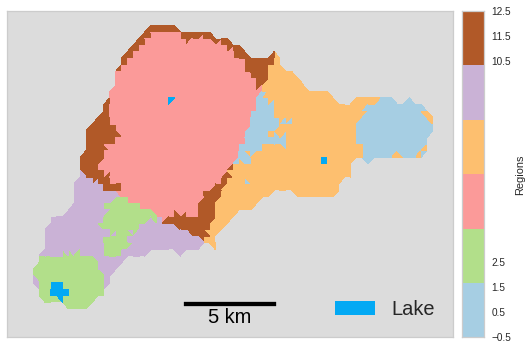

In [106]:
plot_Regions()

In [ ]:
def ind(c):
    
closest_water = np.zeros(config.EI.N_c)
closest_water = np.array([ind(c) for c in range(config.EI.N_c)])